In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Função gaussiana inclinada
def gaussiana_inclinada(x, A, mu, sigma, k):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2)) + k * x

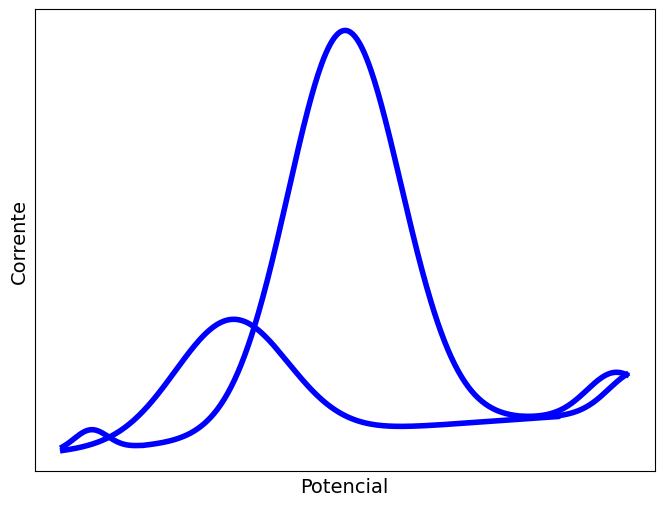

In [78]:
# Parâmetros da gaussiana original
A = 1.0       # Amplitude
mu = 0.0      # Média (centro da gaussiana)
sigma = 1.0   # Desvio padrão (largura da gaussiana)
k = 0.01      # Coeficiente de inclinação

# Gerar dados para o eixo x (Potencial)
x = np.linspace(-5, 5, 500)
y = gaussiana_inclinada(x, A, mu, sigma, k)

# Parâmetros da segunda gaussiana (para x < -4)
A2 = 0.05      # Amplitude da segunda gaussiana
mu2 = -4.5    # Centro da segunda gaussiana
sigma2 = 0.3  # Largura da segunda gaussiana

# Ajustar y para x < -3.6 adicionando a segunda gaussiana
mask = x < -3.6
y[mask] += gaussiana_inclinada(x[mask], A2, mu2, sigma2, 0 * k)  # Inclinação zero para a segunda gaussiana

# Parâmetros da terceira gaussiana (para x > 3.1)
A2 = 0.1      # Amplitude da segunda gaussiana
mu2 = 4.8    # Centro da segunda gaussiana
sigma2 = 0.5  # Largura da segunda gaussiana

# Ajustar y para x > 3.1 adicionando a segunda gaussiana
mask = x > 3.1
y[mask] += gaussiana_inclinada(x[mask], A2, mu2, sigma2, 0 * k)  # Inclinação zero para a segunda gaussiana

# Inverter x e y para a segunda curva
x2 = x[::-1]
y2 = gaussiana_inclinada(x, A * 0.3, mu + 2, sigma, -k)

# Ajustar y2 para x2 < -3.6 subtraindo uma gaussiana
A2 = 0.01     # Amplitude da segunda gaussiana
mask = x2 < -3.6
y2[mask] -= gaussiana_inclinada(x2[mask], A2, mu2, sigma2, 0 * k)  # Inclinação zero para a segunda gaussiana

# Ajustar y2 para x2 > 3.8 adicionando uma gaussiana
A2 = 0.1      # Amplitude da segunda gaussiana
mu2 = 5.2    # Centro da segunda gaussiana
sigma2 = 0.5  # Largura da segunda gaussiana

mask = x2 > 3.8
y2[mask] += gaussiana_inclinada(x2[mask], A2, mu2, sigma2, 0 * k)  # Inclinação zero para a segunda gaussiana

# Plotar o gráfico
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='blue', linewidth=4, label='Curva 1')
plt.plot(x2, y2, color='blue', linewidth=4, label='Curva 2')

# Remover valores dos eixos
plt.xticks([])
plt.yticks([])

# Adicionar rótulos dos eixos
plt.xlabel('Potencial', fontsize=14)
plt.ylabel('Corrente', fontsize=14)

# Remover a legenda (opcional, já que os eixos não têm valores)
plt.legend().remove()

# Mostrar o gráfico
plt.savefig('VC-Exemp.svg',dpi=300)